<a href="https://colab.research.google.com/github/deskaygraphics/My_geoai_Project/blob/main/RS_Coast_Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
#!pip install patchify

In [42]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from patchify import patchify

In [29]:
data_folder = "/content/drive/MyDrive/GeoAi/Myproj_data"

In [30]:
for folder in os.listdir(data_folder):
  print(folder)
  if folder == "Images":
    for image in os.listdir(os.path.join(data_folder, folder)):
      print(image)

Labels
Images
tile_000000.tif
tile_000001.tif
tile_000002.tif


**Visualizing the Image**

In [31]:
Image = cv2.imread("/content/drive/MyDrive/GeoAi/Myproj_data/Images/tile_000002.tif")

In [32]:
Image.shape

(8192, 8192, 3)

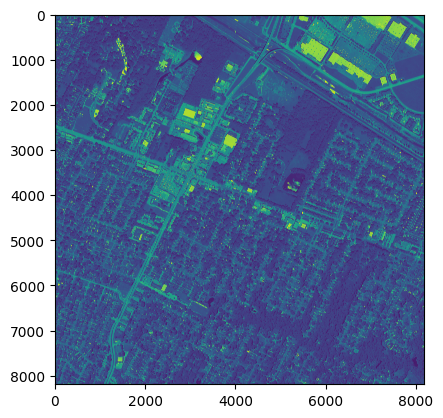

In [33]:
plt.imshow(Image[:,:,0])

**Visualizing the mask**

In [34]:
mask = cv2.imread("/content/drive/MyDrive/GeoAi/Myproj_data/Labels/tile_000002.tif")

In [35]:
mask.shape

(8192, 8192, 3)

In [36]:
labels, counts = np.unique(mask, return_counts=True)
print("labels are: ", labels, "and the counts are: ", counts)

labels are:  [0 1 2 3 4] and the counts are:  [ 1698360 67380864 26241063 66284361 39721944]


**Patchifying**

In [37]:
root_dir = "/content/drive/MyDrive/GeoAi/Myproj_data"

In [38]:
patch_size = 256

In [49]:
root_dir = "/content/drive/MyDrive/GeoAi/Myproj_data"
img_dir = root_dir + "/Images"
patch_size = 256

os.makedirs(root_dir + "/Images_patches", exist_ok=True)

for path, subdirs, files in os.walk(img_dir):
  images = files

  for image_name in images:
    if image_name.endswith(".tif"):
      image_path = os.path.join(path, image_name)

      # Check if the image file exists
      if os.path.exists(image_path):
        image = cv2.imread(image_path, 1)

        if image is not None:
          SIZE_X = (image.shape[1]//patch_size)*patch_size
          SIZE_Y = (image.shape[0]//patch_size)*patch_size
          image = Image.fromarray(image)
          image = image.crop((0, 0, SIZE_X, SIZE_Y))
          image = np.array(image)

          print("Now patchifying image: ", image_path)
          patches_image = patchify(image, (patch_size, patch_size, 3), step=patch_size)

          for i in range(patches_image.shape[0]):
            for j in range(patches_image.shape[1]):
              single_patch_image = patches_image[i,j,:,:]
              single_patch_image = single_patch_image[0]

              output_path = os.path.join(root_dir, "Images_patches", f"{image_name}_patch_{i}{j}.tif")
              os.makedirs(os.path.dirname(output_path), exist_ok=True)

              # Check if the patch was saved successfully
              is_success, im_buf_arr = cv2.imencode(".tif", single_patch_image)
              im_buf_arr.tofile(output_path)

              print(f"Saved patch to: {output_path}")
      else:
        print(f"Image file not found: {image_path}")

Now patchifying image:  /content/drive/MyDrive/GeoAi/Myproj_data/Images/tile_000000.tif
Saved patch to: /content/drive/MyDrive/GeoAi/Myproj_data/Images_patches/tile_000000.tif_patch_00.tif
Saved patch to: /content/drive/MyDrive/GeoAi/Myproj_data/Images_patches/tile_000000.tif_patch_01.tif
Saved patch to: /content/drive/MyDrive/GeoAi/Myproj_data/Images_patches/tile_000000.tif_patch_02.tif
Saved patch to: /content/drive/MyDrive/GeoAi/Myproj_data/Images_patches/tile_000000.tif_patch_03.tif
Saved patch to: /content/drive/MyDrive/GeoAi/Myproj_data/Images_patches/tile_000000.tif_patch_04.tif
Saved patch to: /content/drive/MyDrive/GeoAi/Myproj_data/Images_patches/tile_000000.tif_patch_05.tif
Saved patch to: /content/drive/MyDrive/GeoAi/Myproj_data/Images_patches/tile_000000.tif_patch_06.tif
Saved patch to: /content/drive/MyDrive/GeoAi/Myproj_data/Images_patches/tile_000000.tif_patch_07.tif
Saved patch to: /content/drive/MyDrive/GeoAi/Myproj_data/Images_patches/tile_000000.tif_patch_08.tif
Sav

In [50]:
root_dir = "/content/drive/MyDrive/GeoAi/Myproj_data"
label_dir = root_dir + "/Labels"  # Path to the labels directory
patch_size = 256

os.makedirs(root_dir + "/Labels_patches", exist_ok=True)  # Output directory for label patches

for path, subdirs, files in os.walk(label_dir):
  labels = files

  for label_name in labels:
    if label_name.endswith(".tif"):
      label_path = os.path.join(path, label_name)

      # Check if the label file exists
      if os.path.exists(label_path):
        label = cv2.imread(label_path, 0)  # Load label in grayscale (0)

        if label is not None:
          SIZE_X = (label.shape[1]//patch_size)*patch_size
          SIZE_Y = (label.shape[0]//patch_size)*patch_size
          label = Image.fromarray(label)
          label = label.crop((0, 0, SIZE_X, SIZE_Y))
          label = np.array(label)

          print("Now patchifying label: ", label_path)
          patches_label = patchify(label, (patch_size, patch_size), step=patch_size)  # Adjust patchify for 2D label

          for i in range(patches_label.shape[0]):
            for j in range(patches_label.shape[1]):
              single_patch_label = patches_label[i,j,:,:]
              # single_patch_label = single_patch_label[0]  # No need to extract channel for grayscale

              output_path = os.path.join(root_dir, "Labels_patches", f"{label_name}_patch_{i}{j}.tif")
              os.makedirs(os.path.dirname(output_path), exist_ok=True)

              # Check if the patch was saved successfully
              is_success, im_buf_arr = cv2.imencode(".tif", single_patch_label)
              im_buf_arr.tofile(output_path)

              print(f"Saved patch to: {output_path}")
      else:
        print(f"Label file not found: {label_path}")

Now patchifying label:  /content/drive/MyDrive/GeoAi/Myproj_data/Labels/tile_000000.tif
Saved patch to: /content/drive/MyDrive/GeoAi/Myproj_data/Labels_patches/tile_000000.tif_patch_00.tif
Saved patch to: /content/drive/MyDrive/GeoAi/Myproj_data/Labels_patches/tile_000000.tif_patch_01.tif
Saved patch to: /content/drive/MyDrive/GeoAi/Myproj_data/Labels_patches/tile_000000.tif_patch_02.tif
Saved patch to: /content/drive/MyDrive/GeoAi/Myproj_data/Labels_patches/tile_000000.tif_patch_03.tif
Saved patch to: /content/drive/MyDrive/GeoAi/Myproj_data/Labels_patches/tile_000000.tif_patch_04.tif
Saved patch to: /content/drive/MyDrive/GeoAi/Myproj_data/Labels_patches/tile_000000.tif_patch_05.tif
Saved patch to: /content/drive/MyDrive/GeoAi/Myproj_data/Labels_patches/tile_000000.tif_patch_06.tif
Saved patch to: /content/drive/MyDrive/GeoAi/Myproj_data/Labels_patches/tile_000000.tif_patch_07.tif
Saved patch to: /content/drive/MyDrive/GeoAi/Myproj_data/Labels_patches/tile_000000.tif_patch_08.tif
Sav

In [52]:
image_patch_dir = "/content/drive/MyDrive/GeoAi/Myproj_data/Images_patches"
label_patch_dir = "/content/drive/MyDrive/GeoAi/Myproj_data/Labels_patches"

image_patch_count = len([f for f in os.listdir(image_patch_dir) if os.path.isfile(os.path.join(image_patch_dir, f))])
label_patch_count = len([f for f in os.listdir(label_patch_dir) if os.path.isfile(os.path.join(label_patch_dir, f))])

print(f"Number of image patches: {image_patch_count}")
print(f"Number of label patches: {label_patch_count}")


Number of image patches: 2910
Number of label patches: 2910


In [54]:
#!pip install split-folders

In [56]:
import splitfolders

In [95]:
!pip install tensorflow==2.10
!pip install -U segmentation-models==0.2.1

ERROR: Could not find a version that satisfies the requirement tensorflow==2.10 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)
ERROR: No matching distribution found for tensorflow==2.10


In [100]:
import random

In [101]:
import splitfolders

input_folder = "/content/drive/MyDrive/GeoAi/Myproj_data/256_patches"
output_folder = "/content/drive/MyDrive/GeoAi/Myproj_data/Split_Patches"

# Split the data into training, validation, and testing sets (80%, 10%, 10% respectively)
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25))


Copying files: 25 files [00:01, 29.90 files/s]

KeyboardInterrupt: 

In [102]:
train_img_dir = "/content/drive/MyDrive/GeoAi/Myproj_data/Data/train_images/images"
train_mask_dir = "/content/drive/MyDrive/GeoAi/Myproj_data/Data/train_masks/masks"


In [103]:
img_list = os.listdir(train_img_dir)
msk_list = os.listdir(train_mask_dir)

num_images = len(os.listdir(train_img_dir))
print("Number of images: ", num_images)

Number of images:  2182


In [105]:
img_num = random.randint(0, num_images - 1)

# Use os.path.join to ensure correct path construction
img_path = os.path.join(train_img_dir, img_list[img_num])
img_for_plot = cv2.imread(img_path, 1)

# Check if the image was loaded successfully before proceeding

img_for_plot = cv2.cvtColor(img_for_plot, cv2.COLOR_BGR2RGB)

mask_path = os.path.join(train_mask_dir, msk_list[img_num])  # Similar path construction for mask
mask_for_plot = cv2.imread(mask_path, 0)


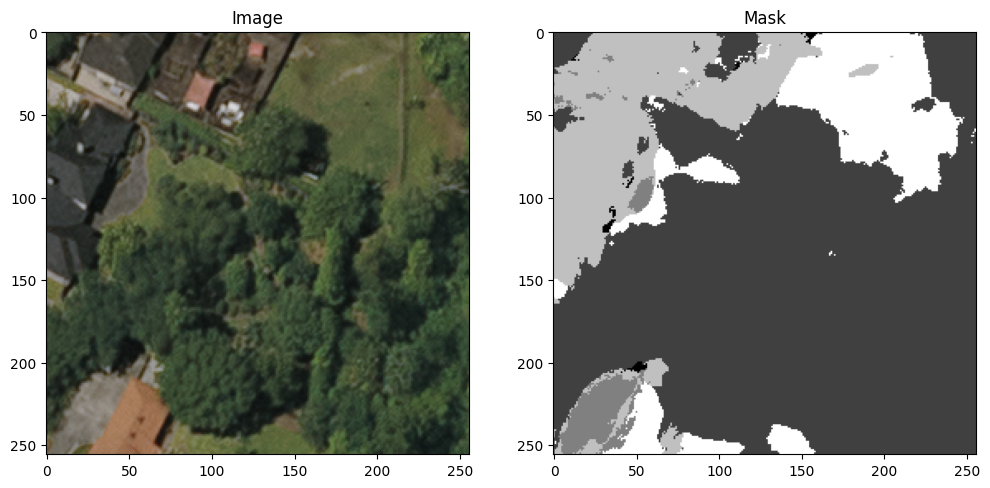

In [106]:
plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(img_for_plot)
plt.title('Image')
plt.subplot(122)
plt.imshow(mask_for_plot, cmap='gray')
plt.title('Mask')
plt.show()

In [ ]:
seed=24
batch_size= 16
n_classes=4

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from keras.utils import to_categorical

#Use this to preprocess input for transfer learning
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)